In [1]:
from subprocess import call
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from shutil import copyfile, move, copy, copytree, rmtree
from distutils.dir_util import copy_tree
from IPython.display import clear_output
from tempfile import mkstemp
from os import fdopen, remove
from sklearn import metrics
import plotly
from ema_workbench import (RealParameter, IntegerParameter, BooleanParameter, ScalarOutcome, ArrayOutcome, Constant, Model, MultiprocessingEvaluator, Policy, perform_experiments, ema_logging )
from ema_workbench import (save_results, load_results, experiments_to_scenarios)
from ema_workbench.em_framework import (sample_uncertainties)

from functools import partial
from multiprocessing import Pool, Lock
import seaborn as sns
%matplotlib inline
import plotly.express as px

import matplotlib.pyplot as plt
from scipy import stats

from numpy.lib import recfunctions as rf

#import ema_workbench.analysis.cart as cart
#from ema_workbench import ema_logging, load_results
#from ema_workbench.analysis import (cart, RuleInductionType)

ema_logging.log_to_stderr(level=ema_logging.INFO)

import io
import math
from io import StringIO

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from sklearn import tree


from ema_workbench.util.ema_exceptions import EMAError
from pygments.unistring import cats

import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import squareform

import os

In [2]:
from ema_workbench.util.utilities import load_results

results_1= load_results('exp_1400_new.tar.gz')
experiments_1, outcomes_1 = results_1

results_2= load_results('exp_new_600.tar.gz')
experiments_2, outcomes_2 = results_2

experiments = pd.concat([experiments_1,experiments_2])

ooi = outcomes_1['lu_map'].astype(int)

ooi = np.vstack((ooi, outcomes_2['lu_map'].astype(int)))

[MainProcess/INFO] results loaded succesfully from C:\Users\teres\Documents\MasterThesis\Final_Run_EMA\Model_2015_2050\exp_1400_new.tar.gz
[MainProcess/INFO] results loaded succesfully from C:\Users\teres\Documents\MasterThesis\Final_Run_EMA\Model_2015_2050\exp_new_600.tar.gz


In [3]:
from PIL import Image
initial = np.array(Image.open('Data\landuse2015_regrouped_rasterized_july.tif'))

In [4]:
base = np.loadtxt('Log_cmd\Land_use\Land use map_2050-Jan-01 00_00_00.asc', skiprows=6)

In [5]:
initial = initial[:-1, :]

In [6]:
def compare_difference (map_2050, map_2015, land_type): # the value is the id of each land-use class (e.g., 8 = 'residential (h)')
    

    #1 In both map
    #2:In the map of 2050, but not in 2015
    #3:In the map of 2015, but not in 2050
    #4: In neither of the maps
    
    mask1 = np.logical_and(map_2050 == land_type, map_2015 == land_type)
    diff_1 = np.where(mask1, 1, 5)
    mask2 = np.logical_and(map_2050  == land_type, map_2015!=land_type)
    diff_2 = np.where (mask2, 2, 5)
    mask3 = np.logical_and(map_2050 != land_type, map_2015 ==land_type)
    diff_3 = np.where(mask3, 3, 5)
    mask4 = np.logical_and(map_2050 != land_type, map_2015 !=land_type)
    diff_4 = np.where(mask4, 4, 5)
    
    diff = np.min([diff_1, diff_2, diff_3, diff_4], axis=0)

    colors = {"green":1,"blue":2,"red":3, "white":4}
    d_colors = sorted(colors, key=colors.get)
    cMap_1 = ListedColormap(d_colors)

    pic = sns.heatmap(diff,cmap = cMap_1, cbar = False,
                      yticklabels=False, xticklabels=False)
    
    sns.despine(fig=None, ax=None, top=False, right=False, left=False, bottom=False, offset=None) 
    
    return pic

In [7]:
from matplotlib.colors import ListedColormap
# Set the map colors consistent with those in the Metronamica model 
colors = {(255/256,255/256,255/256):1,(255/256,0/256,0/256):2,
          (255/256,87/256,87/256):3,(255/256,255/256,0/256):4, 
          (87/256,87/256,255/256):5, (255/256,233/256,255/256):6, 
          (255/256,160/256,255/256):7, (192/256,0/256,192/256):8, 
          (0/256,192/256,36/256):9, (160/256,255/256,160/256):10,
          (161/256,225/256,251/256):11, (162/256,137/256,118/256):12,
          (0/255, 0/255, 128/255):13, (210/255, 210/255, 210/255):0}
l_colors = sorted(colors, key=colors.get)
cMap = ListedColormap(l_colors)

In [8]:
def count_changes (change_set):
    unique,count=np.unique(change_set,return_counts=True)
    data_count=dict(zip(unique,count))
    return data_count

In [9]:
def compare_difference_2 (map_2050, map_2015, land_type): # the value is the id of each land-use class (e.g., 8 = 'residential (h)')
    

    #1 In both map
    #2:In the map of 2050, but not in 2015
    #3:In the map of 2015, but not in 2050
    #4: In neither of the maps
    
    mask1 = np.logical_and(map_2050 == land_type, map_2015 == land_type)
    diff_1 = np.where(mask1, 1, 5)
    mask2 = np.logical_and(map_2050  == land_type, map_2015!=land_type)
    diff_2 = np.where (mask2, 2, 5)
    mask3 = np.logical_and(map_2050 != land_type, map_2015 ==land_type)
    diff_3 = np.where(mask3, 3, 5)
    mask4 = np.logical_and(map_2050 != land_type, map_2015 !=land_type)
    diff_4 = np.where(mask4, 4, 5)
    
    diff = np.min([diff_1, diff_2, diff_3, diff_4], axis=0)
    
    return diff

In [10]:
def print_map (map):
    plt.figure(figsize=(8, 6))
    map_ = sns.heatmap(map, cmap = cMap,cbar = False,
                      yticklabels=False, xticklabels=False)
    
    sns.despine(fig=None, ax=None, top=False, right=False, left=False, bottom=False, offset=None) 
    return map_ 

In [11]:
repres_maps = [1349, 906, 1382, 335, 531, 883, 1726, 992, 783, 1846, 1110, 1646, 208, 909, 1414, 1171, 938, 1131, 708, 1338,
               785, 1875, 1949, 1951, 178, 1195, 1366, 1467, 1649, 1737, 1995, 1964, 577, 1584]

#### Changes in the amounts of land cells

In [12]:
maps_overview = {}
#j = 0
for i in repres_maps:
    land_cells = counts = np.unique(ooi[i,:,:], return_counts=True)[1]
    maps_overview['Map %d'%i] = land_cells
    #j = j+1

In [13]:
df_maps = pd.DataFrame(maps_overview,
                  index =['Outside', 'Agriculture', 'Greenhouses', 'Industry/Mineral', 'Public Amenities', 
                          'Commercial','Residential(L)','Residential(M)','Residential(H)','Recreation','Nature',
                          'Water', "Transport",'Airport' ] )

In [14]:
df_maps['Base Map'] = np.unique(base, return_counts=True)[1]

In [15]:
df_maps

,Map 1349,Map 906,Map 1382,Map 335,Map 531,Map 883,Map 1726,Map 992,Map 783,Map 1846,...,Map 1195,Map 1366,Map 1467,Map 1649,Map 1737,Map 1995,Map 1964,Map 577,Map 1584,Base Map
Outside,264270,264288,264270,264285,264286,264301,264293,264295,264282,264269,...,264303,264294,264320,264303,264314,264299,264289,264299,264287,264286
Agriculture,64322,64305,64323,64307,64307,64292,64301,64297,64311,64324,...,64291,64299,64273,64290,64279,64293,64303,64294,64306,64307
Greenhouses,459,459,459,459,459,459,459,459,459,459,...,459,459,459,459,459,459,459,459,459,459
Industry/Mineral,529,528,528,529,528,528,527,529,528,528,...,527,528,528,528,528,529,529,528,528,528
Public Amenities,3701,3701,3701,3701,3701,3701,3701,3701,3701,3701,...,3701,3701,3701,3701,3701,3701,3701,3701,3701,3701
Commercial,15404,15404,15404,15404,15404,15404,15404,15404,15404,15404,...,15404,15404,15404,15404,15404,15404,15404,15404,15404,15404
Residential(L),588,588,588,588,588,588,588,588,588,588,...,588,588,588,588,588,588,588,588,588,588
Residential(M),5290,5290,5290,5290,5290,5290,5290,5290,5290,5290,...,5290,5290,5290,5290,5290,5290,5290,5290,5290,5290
Residential(H),23512,23512,23512,23512,23512,23512,23512,23512,23512,23512,...,23512,23512,23512,23512,23512,23512,23512,23512,23512,23512
Recreation,16511,16511,16511,16511,16511,16511,16511,16511,16511,16511,...,16511,16511,16511,16511,16511,16511,16511,16511,16511,16511


In [16]:
df_changed_cells = df_maps.rsub(df_maps['Base Map'], axis = 0)

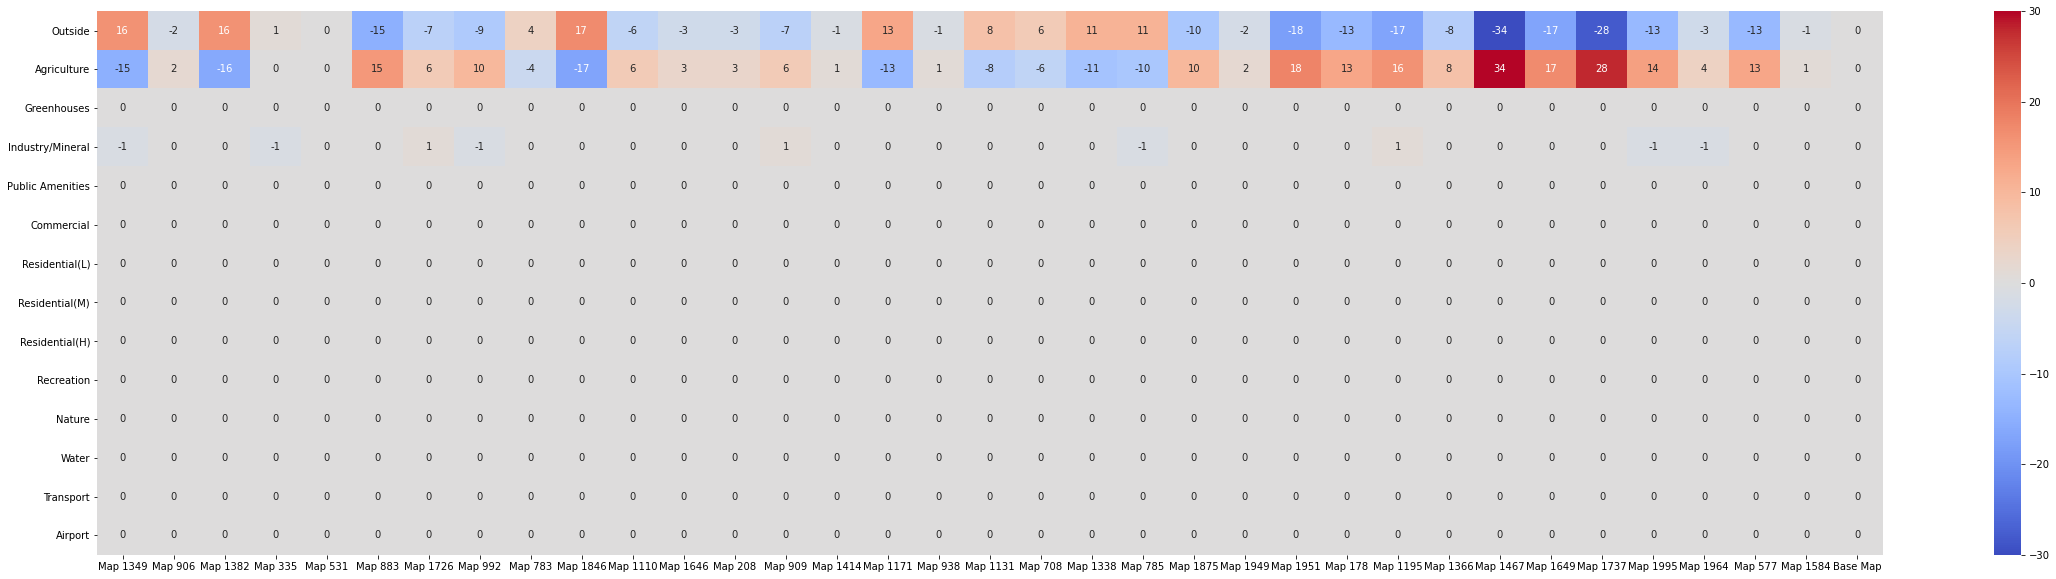

In [23]:
plt.figure(figsize=(40,10))
ax = sns.heatmap(df_changed_cells, annot = True, vmin=-30, vmax=30, cmap='coolwarm', center = 0)
sns_hist = ax
fig = sns_hist.get_figure()
plt.savefig('amount_of_changed_cells.png',dpi=500)#,bbox_inches='tight'

This means the flooding suitability uncertainties do not change the land cells by their amounts.

### Changes in the land locations

In [25]:
def appread_cells (map_, base = base): # the value is the id of each land-use class (e.g., 8 = 'residential (h)')
    

#This functions highlights the land cells that are in the uncertainty maps but not in the base map

    
    mask_0 = np.logical_and(map_ == 0, base==0 )
    diff_0 = np.where(mask_0, 0, 12)
    mask_1 = np.logical_and(map_ == 1, base!=1 )
    diff_1 = np.where(mask_1, 1, 12)
    mask_2 = np.logical_and(map_ == 2, base!=2 )
    diff_2 = np.where(mask_2, 2, 12)
    mask_3 = np.logical_and(map_ == 3, base!=3 )
    diff_3 = np.where(mask_3, 3, 12)
    mask_4 = np.logical_and(map_ == 4, base!=4)
    diff_4 = np.where(mask_4, 4, 12)
    mask_5 = np.logical_and(map_ == 5, base!=5)
    diff_5 = np.where(mask_5, 5, 12)
    mask_6 = np.logical_and(map_ == 6, base!=6)
    diff_6 = np.where(mask_6, 6, 12)
    mask_7 = np.logical_and(map_ == 7, base!=7)
    diff_7 = np.where(mask_7, 7, 12) 
    mask_8 = np.logical_and(map_ == 8, base!=8)
    diff_8 = np.where(mask_8, 8, 12)
    mask_9 = np.logical_and(map_ == 9, base!=9)
    diff_9 = np.where(mask_9, 9, 12)
    mask_10 = np.logical_and(map_ == 10, base!=10)
    diff_10 = np.where(mask_10, 10, 12)
    mask_11 = np.logical_and(map_ == 11, base!=11)
    diff_11 = np.where(mask_11, 11, 12)  
    
    newly_appear = np.min([diff_0, diff_1, diff_2, diff_3, diff_4, diff_5, diff_6, diff_7, diff_8,
                  diff_9, diff_10, diff_11], axis=0)

    from matplotlib.colors import ListedColormap
    colors = {(255/256,255/256,255/256):1,(255/256,0/256,0/256):2,
               (255/256,87/256,87/256):3,(255/256,255/256,0/256):4, 
               (87/256,87/256,255/256):5, #(255/256,233/256,255/256):6, 
               "lightpink":6,
               #"black":6,
               (255/256,160/256,255/256):7, (192/256,0/256,192/256):8, 
               (0/256,192/256,36/256):9, (160/256,255/256,160/256):10,
               (161/256,225/256,251/256):11, "gainsboro": 12, (210/255, 210/255, 210/255):0}
    l_colors = sorted(colors, key=colors.get)
    cMap = ListedColormap(l_colors)

    pic = sns.heatmap(newly_appear,cmap = cMap, cbar = True,
                      yticklabels=False, xticklabels=False)
    
    sns.despine(fig=None, ax=None, top=False, right=False, left=False, bottom=False, offset=None) 
    
    return pic

In [24]:
def disappeared_cells (map_, base = base): # the value is the id of each land-use class (e.g., 8 = 'residential (h)')
    

#This functions highlights the land cells that are in the uncertainty maps but not in the base map

    
    mask_0 = np.logical_and(map_ == 0, base==0 )
    diff_0 = np.where(mask_0, 0, 12)
    mask_1 = np.logical_and(map_ != 1, base==1 )
    diff_1 = np.where(mask_1, 1, 12)
    mask_2 = np.logical_and(map_ != 2, base==2 )
    diff_2 = np.where(mask_2, 2, 12)
    mask_3 = np.logical_and(map_ != 3, base==3 )
    diff_3 = np.where(mask_3, 3, 12)
    mask_4 = np.logical_and(map_ != 4, base==4)
    diff_4 = np.where(mask_4, 4, 12)
    mask_5 = np.logical_and(map_ != 5, base==5)
    diff_5 = np.where(mask_5, 5, 12)
    mask_6 = np.logical_and(map_ != 6, base==6)
    diff_6 = np.where(mask_6, 6, 12)
    mask_7 = np.logical_and(map_ != 7, base==7)
    diff_7 = np.where(mask_7, 7, 12) 
    mask_8 = np.logical_and(map_ != 8, base==8)
    diff_8 = np.where(mask_8, 8, 12)
    mask_9 = np.logical_and(map_ != 9, base==9)
    diff_9 = np.where(mask_9, 9, 12)
    mask_10 = np.logical_and(map_ != 10, base==10)
    diff_10 = np.where(mask_10, 10, 12)
    mask_11 = np.logical_and(map_ != 11, base==11)
    diff_11 = np.where(mask_11, 11, 12)  
    
    newly_appear = np.min([diff_0, diff_1, diff_2, diff_3, diff_4, diff_5, diff_6, diff_7, diff_8,
                  diff_9, diff_10, diff_11], axis=0)

    from matplotlib.colors import ListedColormap
    colors = {(255/256,255/256,255/256):1,(255/256,0/256,0/256):2,
               (255/256,87/256,87/256):3,(255/256,255/256,0/256):4, 
               (87/256,87/256,255/256):5, #(255/256,233/256,255/256):6, 
              "lightpink":6,
              #"black":6,
               (255/256,160/256,255/256):7, (192/256,0/256,192/256):8, 
               (0/256,192/256,36/256):9, (160/256,255/256,160/256):10,
               (161/256,225/256,251/256):11, "gainsboro": 12, (210/255, 210/255, 210/255):0}
    l_colors = sorted(colors, key=colors.get)
    cMap = ListedColormap(l_colors)

    pic = sns.heatmap(newly_appear,cmap = cMap, cbar = True,
                      yticklabels=False, xticklabels=False)
    
    sns.despine(fig=None, ax=None, top=False, right=False, left=False, bottom=False, offset=None) 
    
    return pic

In [19]:
def plot_the_differences(map_, num_, base=base):
    #print('Map %d'% num_)
    pic = plt.figure(figsize=(17, 5))
    plt.subplot(121)
    disappeared_cells(map_,base)
    plt.title('The disappeared cells on the base map (compared to the suitability uncertainty map)', fontsize= 10)
    plt.subplot(122)
    appread_cells(map_, base)
    plt.title('The appeared cells on the suitability uncertainty map (compared to the base map)', fontsize= 10)
    plt.suptitle('Map %d'% num_, fontsize = 12)

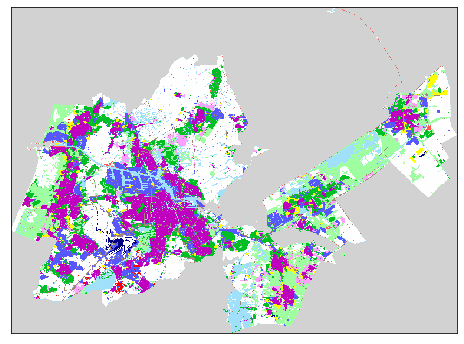

In [20]:
print_map(base)
plt.savefig('baseline.png',bbox_inches='tight', dpi=200 )
plt.show()

In [76]:
#appread_cells(ooi[1382,:,:], base)
#plt.savefig('appeared_rh.png',bbox_inches='tight', dpi=200)

#### Category 1

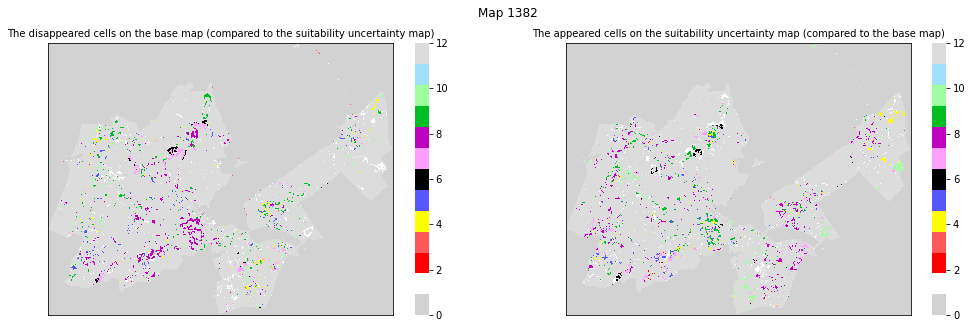

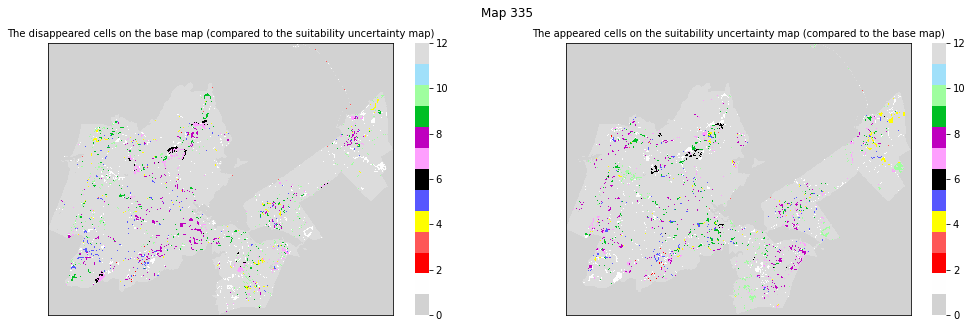

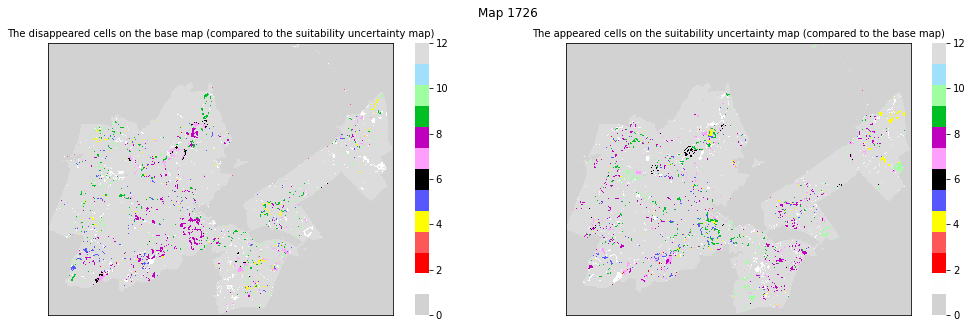

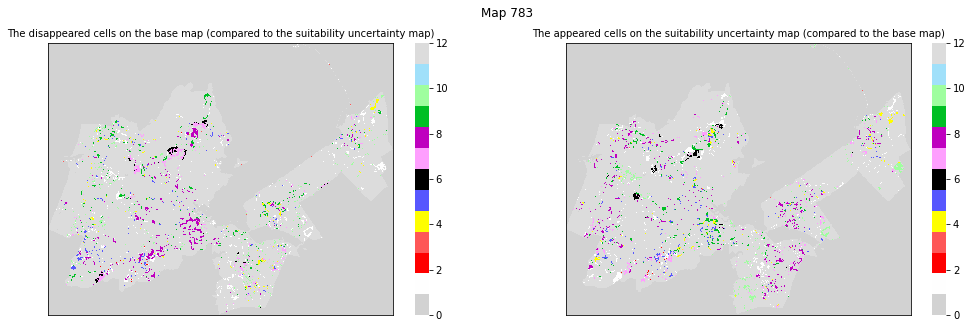

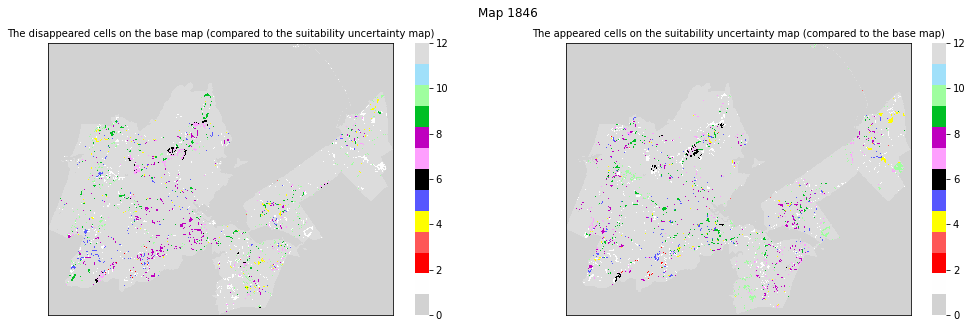

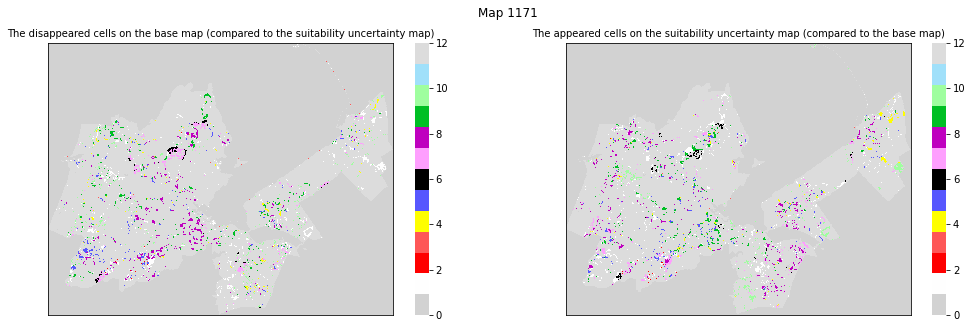

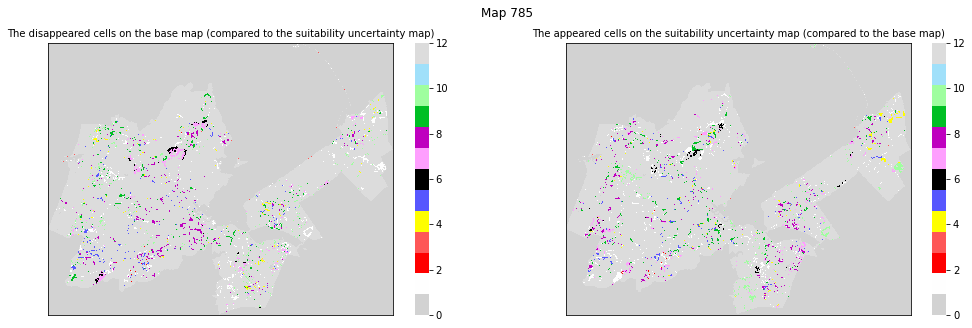

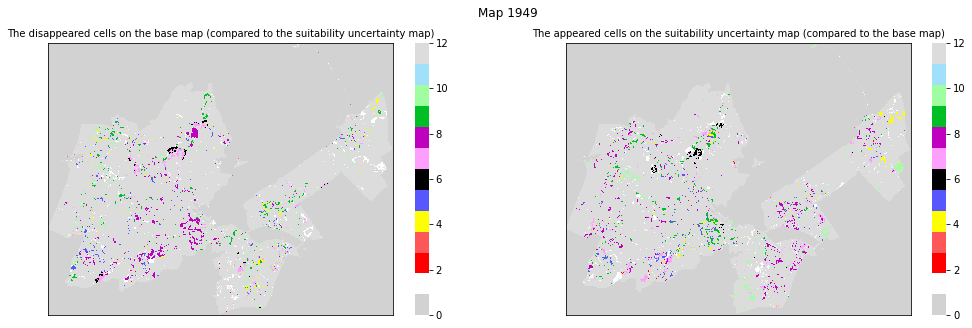

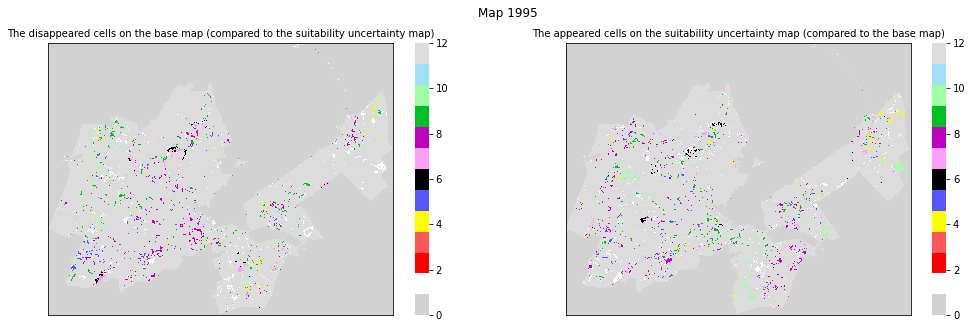

In [52]:
index = [3,4,7,9,10,16,21,23,31]
index_ = [num - 1 for num in index]

for i in index_:
    no_ = repres_maps[i] 
    plot_the_differences(ooi[no_,:,:],no_, base)
    #plt.savefig('cat1.png')

In [274]:
#from ema_workbench import ema_logging
#from ema_workbench.analysis import prim

ema_logging.log_to_stderr(ema_logging.INFO)

<Logger EMA (DEBUG)>

In [33]:
x = experiments.iloc[repres_maps,:]

In [34]:
cat1 = [3,4,7,9,10,16,21,23,31]
cat1_ = [i -1 for i in cat1]
x1 = x.iloc[cat1_,:]

In [70]:
x1

,mid_agri,mid_comm,mid_gh,mid_min,mid_pa,mid_rec,mid_rh,mid_rl,mid_rm,small_agri,...,small_gh,small_min,small_pa,small_rec,small_rh,small_rl,small_rm,scenario,policy,model
1382,0.864129,0.308969,0.600434,0.746963,0.487930,0.883382,0.032622,0.491932,0.116855,0.903869,...,0.909861,0.962362,0.735076,0.960444,0.996104,0.935212,0.593334,1407,None,lakeproblem
335,0.810241,0.180136,0.602463,0.893175,0.421316,0.738350,0.268515,0.550414,0.183947,0.938404,...,0.862512,0.976664,0.790443,0.951206,0.618496,0.710495,0.671683,360,None,lakeproblem
326,0.805780,0.494941,0.628466,0.793166,0.398898,0.833383,0.075093,0.570384,0.355486,0.902838,...,0.846079,0.936480,0.942979,0.914057,0.897760,0.919714,0.503447,331,None,lakeproblem
783,0.800164,0.477499,0.668714,0.750672,0.541352,0.888095,0.046425,0.592476,0.133030,0.961106,...,0.822722,0.993185,0.680313,0.921573,0.786489,0.982380,0.973590,808,None,lakeproblem
446,0.823235,0.173817,0.771384,0.820929,0.428850,0.835278,0.386955,0.394117,0.110182,0.937027,...,0.961607,0.963436,0.691354,0.956412,0.967479,0.772141,0.745007,451,None,lakeproblem
1171,0.848637,0.108295,0.647655,0.721251,0.251568,0.779562,0.142830,0.532631,0.119310,0.989984,...,0.920040,0.921755,0.763399,0.907694,0.903511,0.892286,0.572974,1196,None,lakeproblem
785,0.808199,0.151636,0.664913,0.762074,0.227928,0.715779,0.374358,0.574119,0.188170,0.949363,...,0.992442,0.903960,0.920214,0.999972,0.999556,0.995908,0.513171,810,None,lakeproblem
549,0.811403,0.421332,0.726831,0.744611,0.333448,0.733733,0.018785,0.594951,0.119985,0.989409,...,0.888386,0.995646,0.898074,0.906134,0.956176,0.843140,0.710967,554,None,lakeproblem
595,0.803442,0.234122,0.665173,0.751238,0.286386,0.893176,0.269600,0.591461,0.284234,0.974670,...,0.850073,0.970702,0.614981,0.936168,0.585318,0.692017,0.624787,600,None,lakeproblem


In [45]:
#y1 = np.zeros([34], dtype = int)
#cat1 = [3,4,7,9,10,16,21,23,31]
#for i in cat1:
    #y1[i] = 1

In [43]:
#prim_obj = prim.Prim(x,y1, threshold=0.2, peel_alpha=0.1)
#box1 = prim_obj.find_box()
#box1.peeling_trajectory

In [44]:
#plot_the_differences(ooi[906,:,:],906, base)
#plt.savefig('common.png',bbox_inches='tight', dpi=200)

In [46]:
#plot_the_differences(ooi[178,:,:],178, base)
#plt.savefig('common2.png',bbox_inches='tight', dpi=200)

#### Category 2

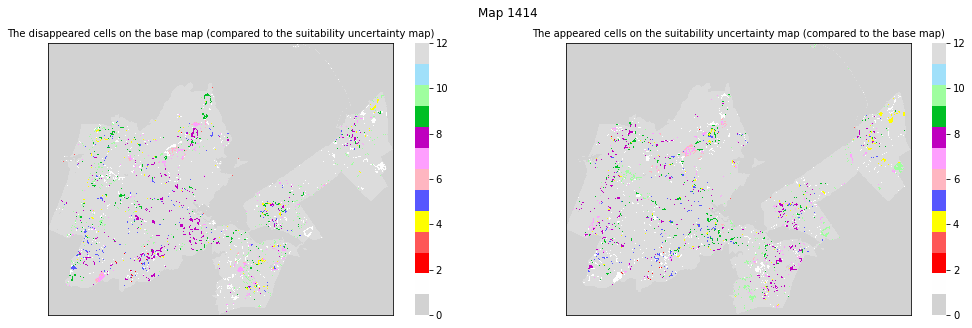

In [28]:
plot_the_differences(ooi[1414,:,:],1414, base)
plt.savefig('appeared_rm.png',bbox_inches='tight', dpi=300)

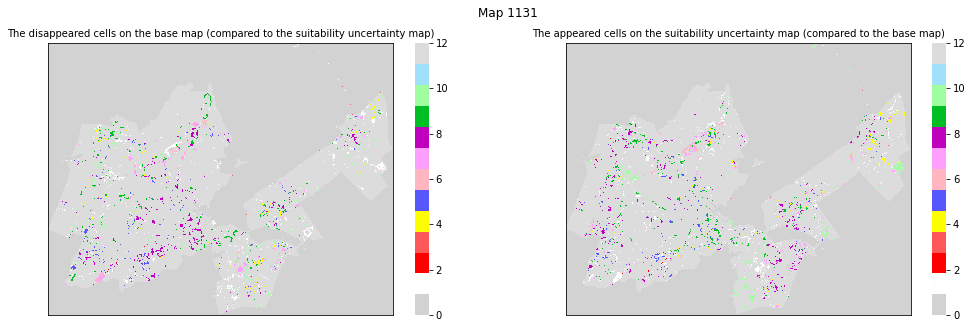

In [30]:
plot_the_differences(ooi[1131,:,:],1131, base)
plt.savefig('appeared_rm1.png',bbox_inches='tight', dpi=300)

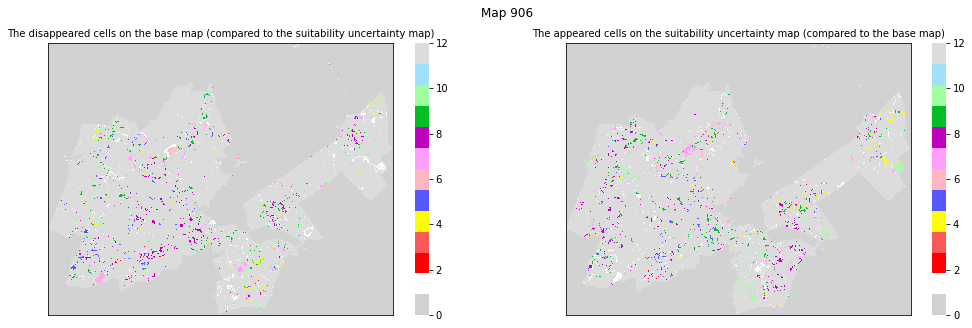

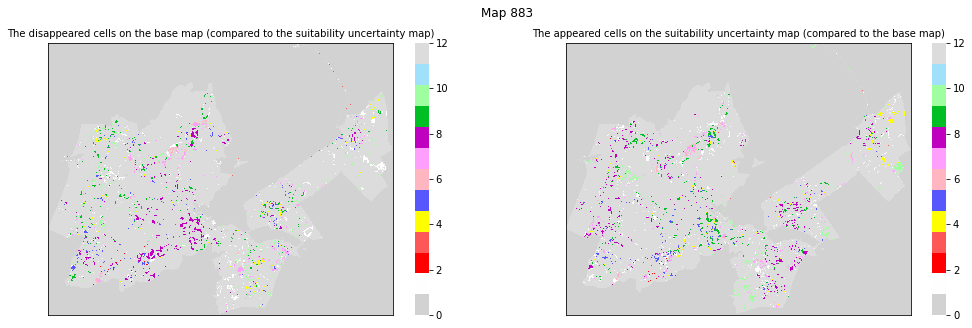

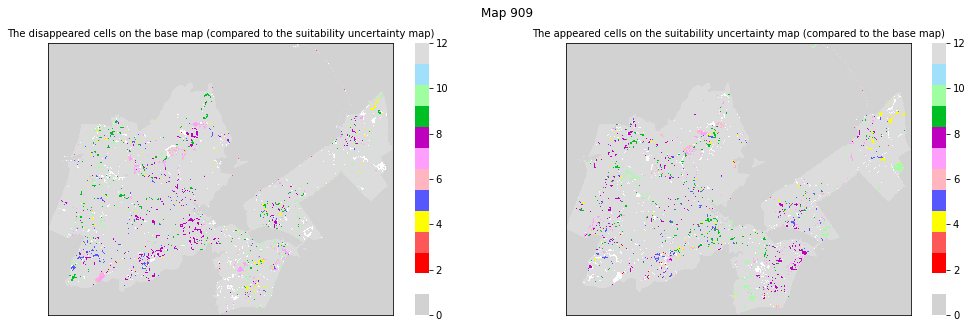

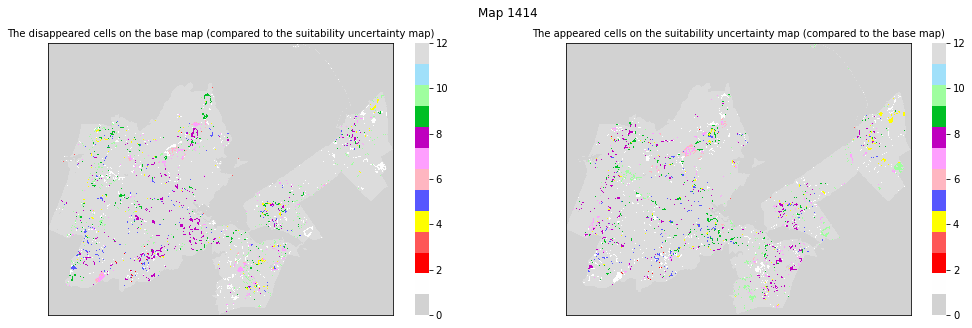

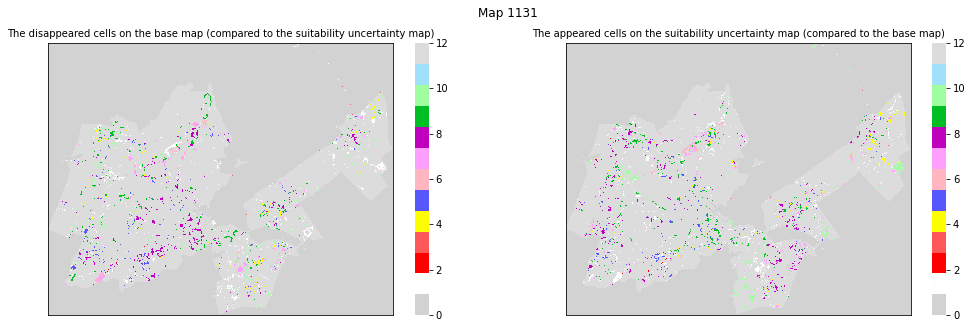

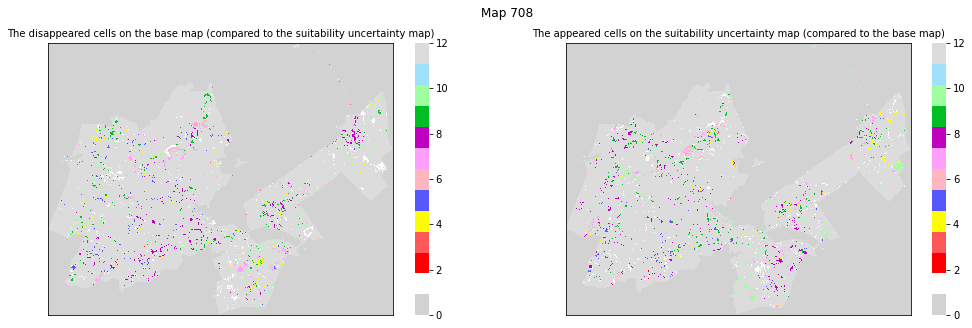

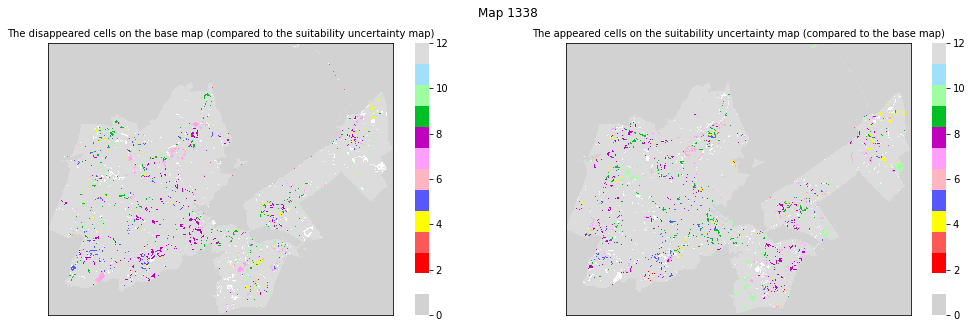

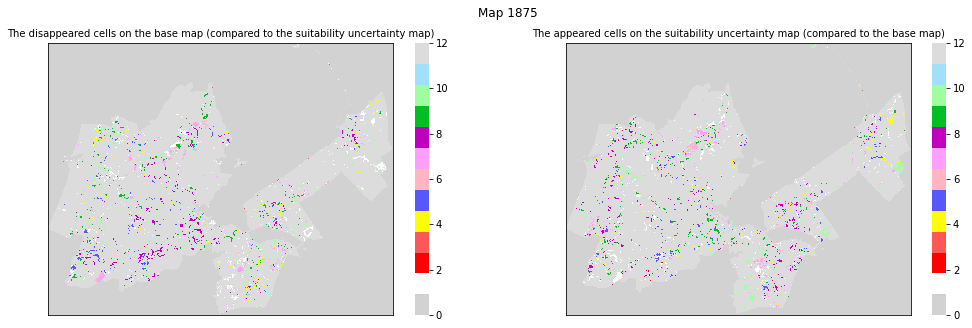

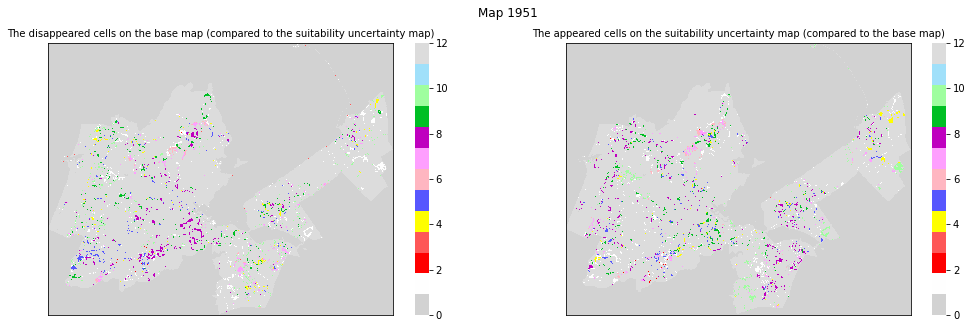

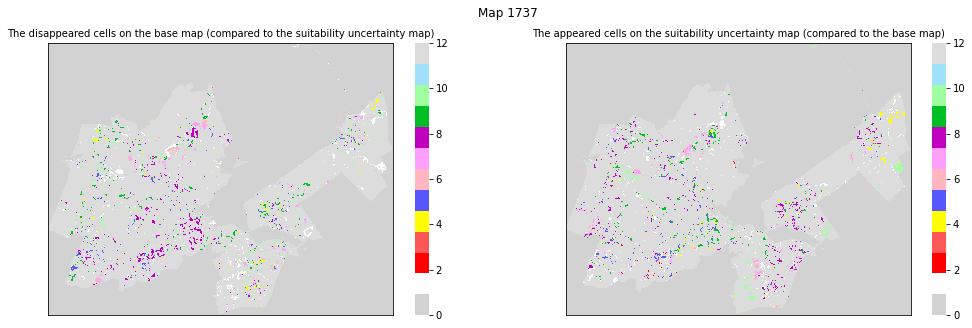

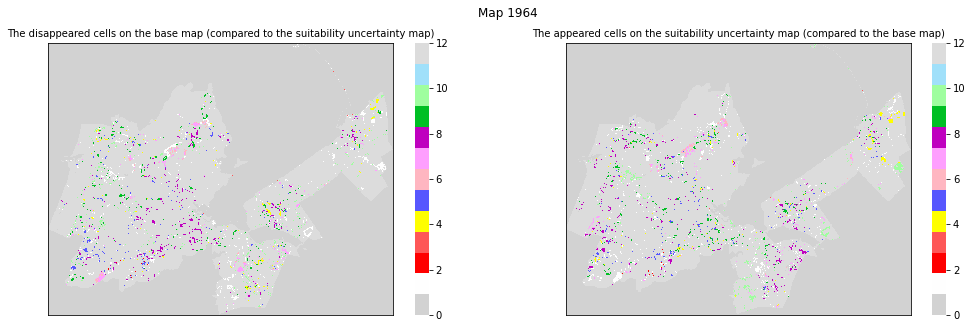

In [26]:
index = [2,6,14,15,18,19,20,22,24,30,32]
index_ = [num - 1 for num in index]

for i in index_:
    no_ = repres_maps[i] 
    plot_the_differences(ooi[no_,:,:],no_, base)

In [31]:
cat2 = [2,6,14,15,18,19,20,22,24,30,32]
cat2_ = [i-1 for i in cat2]

In [35]:
x2 = x.iloc[cat2_,:]

In [36]:
x2

,mid_agri,mid_comm,mid_gh,mid_min,mid_pa,mid_rec,mid_rh,mid_rl,mid_rm,small_agri,...,small_gh,small_min,small_pa,small_rec,small_rh,small_rl,small_rm,scenario,policy,model
906,0.882008,0.493880,0.676939,0.824358,0.270900,0.702206,0.283832,0.287933,0.194105,0.919597,...,0.884937,0.996785,0.854031,0.971684,0.559526,0.620420,0.749589,931,None,lakeproblem
883,0.840158,0.464627,0.737701,0.744541,0.218906,0.861662,0.020166,0.369982,0.357028,0.978099,...,0.987269,0.993762,0.820976,0.918075,0.755889,0.774719,0.962631,908,None,lakeproblem
909,0.883172,0.280042,0.793040,0.876937,0.378243,0.724223,0.138916,0.362908,0.179349,0.975601,...,0.824475,0.984498,0.662229,0.939084,0.568940,0.834350,0.792350,934,None,lakeproblem
14,0.861168,0.358391,0.698103,0.883863,0.246988,0.702847,0.164678,0.332537,0.229238,0.999151,...,0.854942,0.984467,0.767344,0.997092,0.611905,0.808341,0.876431,19,None,lakeproblem
1131,0.881553,0.417565,0.768396,0.837319,0.237361,0.738557,0.216788,0.303119,0.164154,0.993538,...,0.927709,0.996937,0.745470,0.985923,0.661285,0.967310,0.722246,1156,None,lakeproblem
708,0.817047,0.310667,0.769063,0.719311,0.285964,0.871732,0.330771,0.262825,0.189800,0.919803,...,0.918844,0.938430,0.763998,0.934425,0.405265,0.776573,0.709034,733,None,lakeproblem
1338,0.869578,0.470579,0.699245,0.718770,0.248806,0.865990,0.186277,0.368668,0.158825,0.935497,...,0.881080,0.921172,0.714253,0.989778,0.603945,0.688369,0.580894,1363,None,lakeproblem
475,0.808319,0.115872,0.617471,0.791753,0.588175,0.729009,0.239007,0.285630,0.496469,0.939159,...,0.863528,0.961261,0.872846,0.922233,0.700430,0.729501,0.515871,480,None,lakeproblem
551,0.875513,0.111891,0.673017,0.858564,0.534655,0.817327,0.064910,0.525128,0.455728,0.954431,...,0.997434,0.994898,0.815083,0.958930,0.704176,0.821658,0.990842,556,None,lakeproblem
337,0.855709,0.354056,0.776958,0.766926,0.458677,0.855868,0.118771,0.256833,0.480852,0.968463,...,0.913789,0.978801,0.849301,0.952476,0.972077,0.814274,0.898558,342,None,lakeproblem


#### Category 3

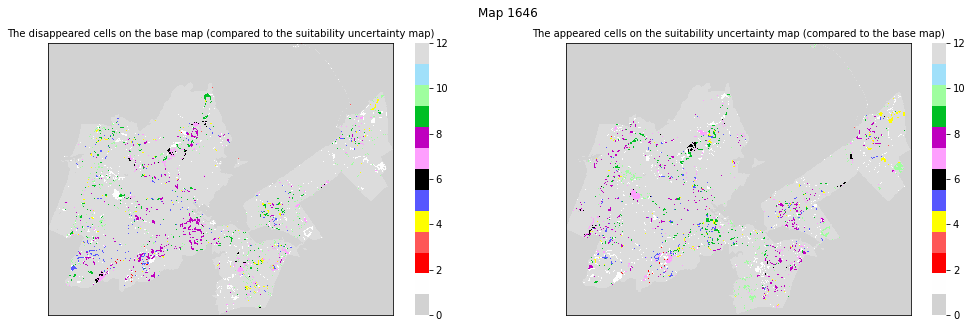

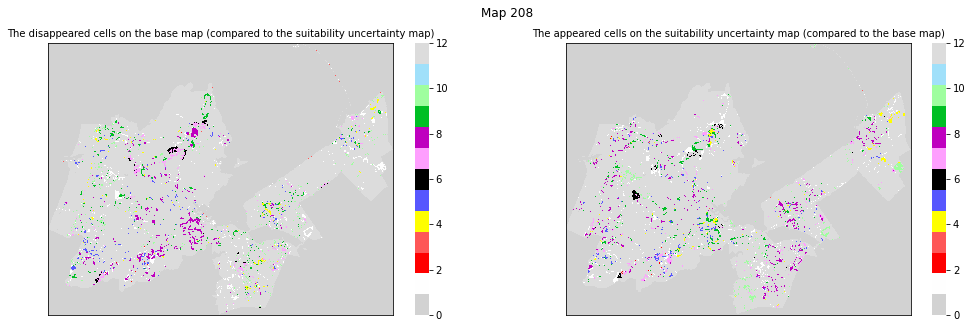

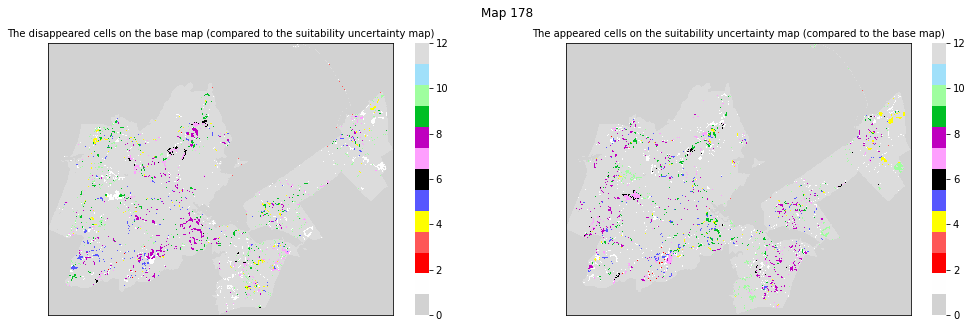

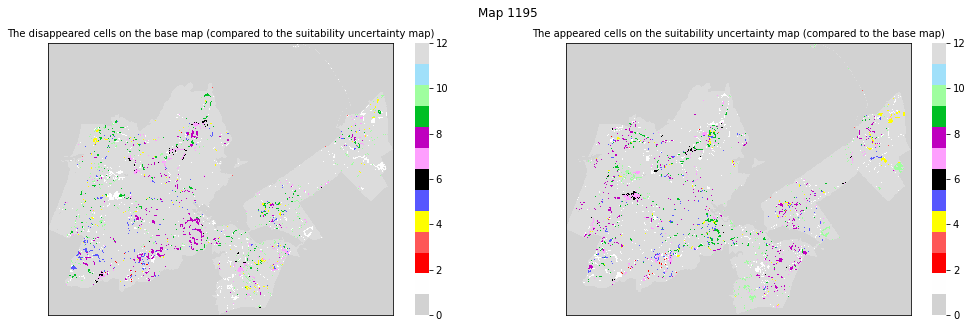

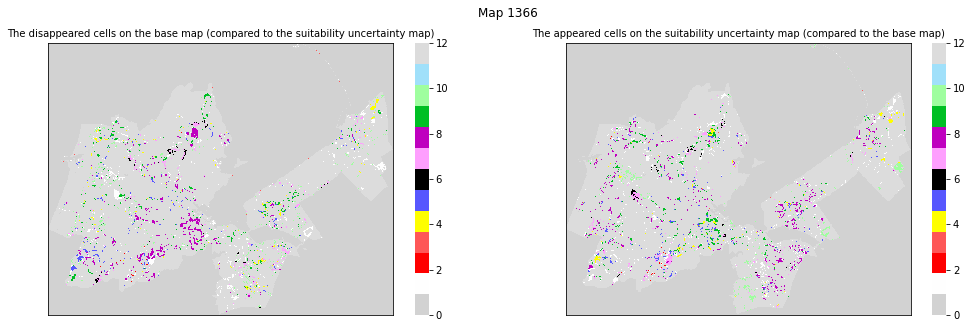

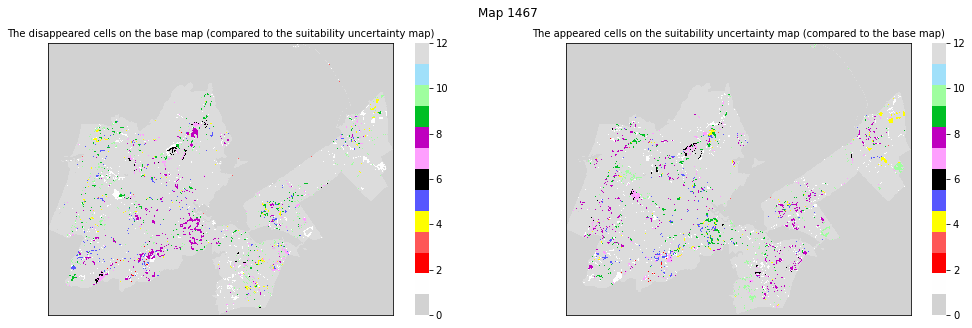

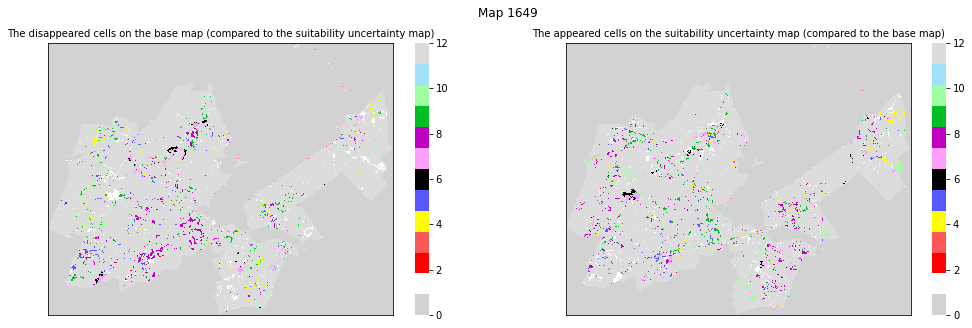

In [77]:
index = [12,13,25,26,27,28,29]
index_ = [num - 1 for num in index]

for i in index_:
    no_ = repres_maps[i] 
    plot_the_differences(ooi[no_,:,:],no_, base)
    
#plt.savefig("category_3.png")

In [86]:
cat3 = [12,13,25,26,27,28,29]
cat3_ = [i-1 for i in cat3]
x3 = x.iloc[cat3_,:]

In [87]:
x3

,mid_agri,mid_comm,mid_gh,mid_min,mid_pa,mid_rec,mid_rh,mid_rl,mid_rm,small_agri,...,small_gh,small_min,small_pa,small_rec,small_rh,small_rl,small_rm,scenario,policy,model
246,0.815091,0.297237,0.639713,0.752464,0.373373,0.807919,0.000789,0.213443,0.347335,0.975979,...,0.873736,0.964166,0.760883,0.948224,0.831796,0.954986,0.505685,251,None,lakeproblem
208,0.841275,0.245888,0.672555,0.859056,0.345290,0.831012,0.037002,0.553321,0.189475,0.995931,...,0.928443,0.964933,0.705684,0.954875,0.992025,0.600614,0.920774,233,None,lakeproblem
178,0.825129,0.134371,0.654974,0.828234,0.513389,0.825651,0.014189,0.391142,0.436829,0.982064,...,0.928902,0.939091,0.973018,0.982056,0.688229,0.733151,0.550894,203,None,lakeproblem
1195,0.810740,0.135148,0.654769,0.876276,0.356123,0.842480,0.030199,0.440082,0.446717,0.970721,...,0.976666,0.926295,0.985763,0.946559,0.771156,0.878732,0.685122,1220,None,lakeproblem
1366,0.864823,0.200286,0.656512,0.822064,0.586049,0.762870,0.013666,0.462367,0.424243,0.919389,...,0.827257,0.918423,0.690422,0.995137,0.981152,0.669365,0.637450,1391,None,lakeproblem
67,0.855260,0.434748,0.733407,0.807852,0.516671,0.753338,0.030436,0.411490,0.464955,0.978838,...,0.865981,0.955310,0.928465,0.913090,0.989349,0.874799,0.925326,72,None,lakeproblem
249,0.876269,0.116374,0.766497,0.817328,0.488958,0.742606,0.132996,0.587512,0.478208,0.921158,...,0.850681,0.999785,0.907230,0.906824,0.895399,0.986769,0.663372,254,None,lakeproblem


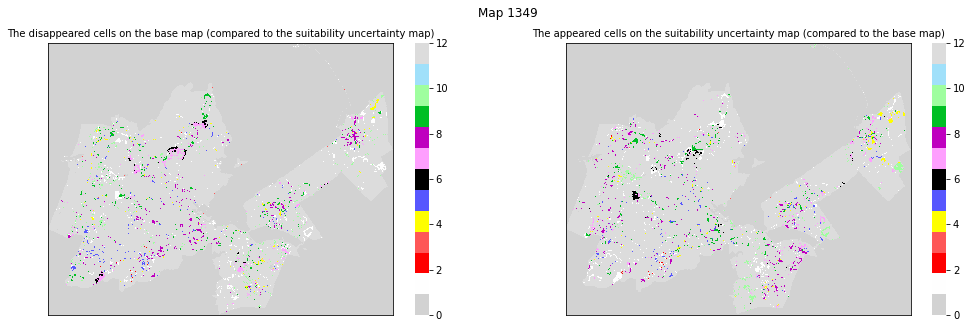

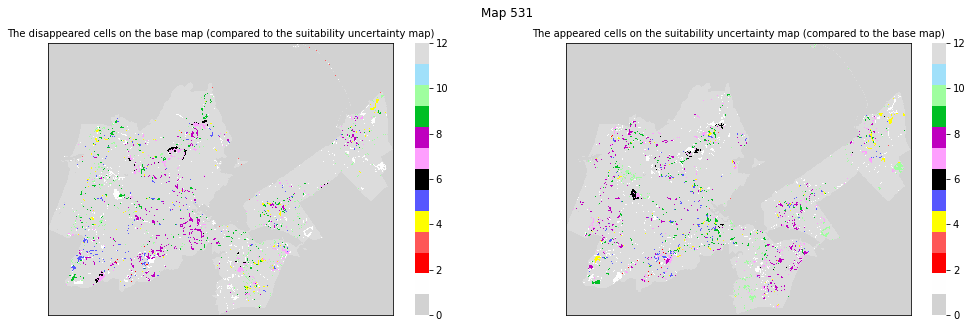

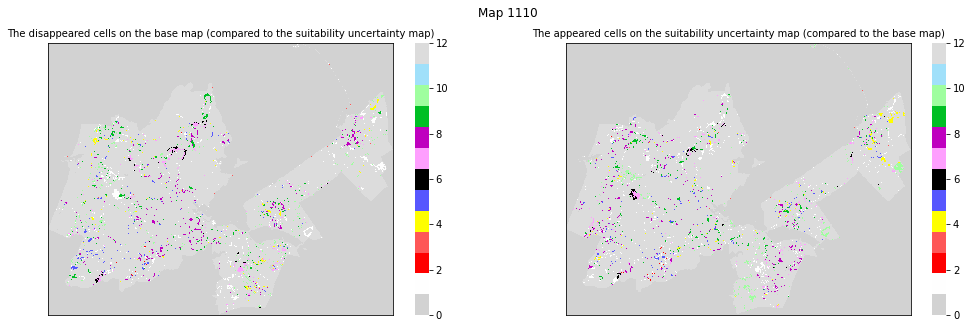

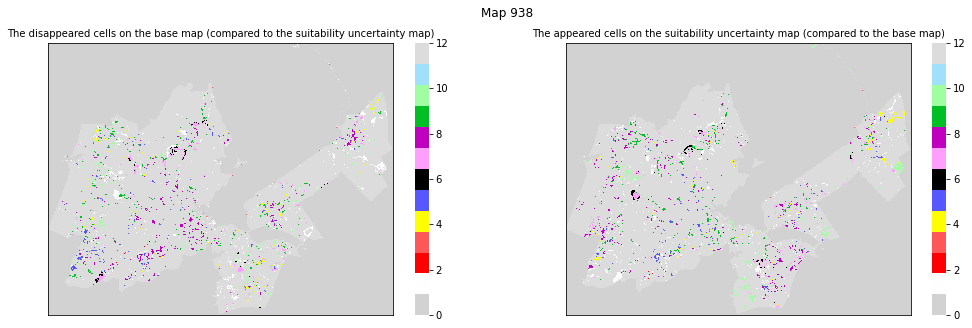

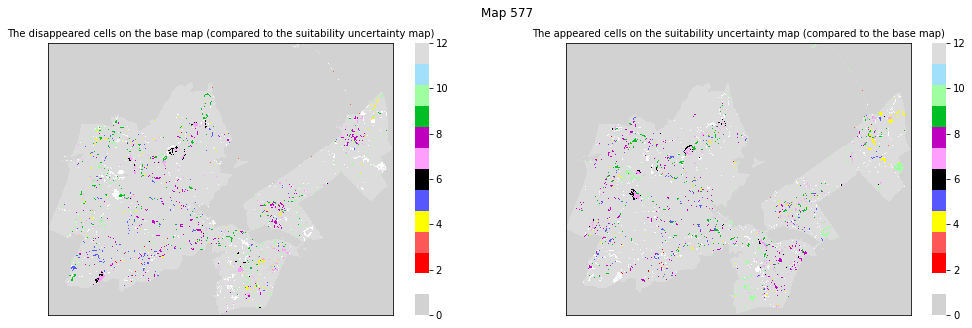

In [90]:
index = [1,5,11,17,33]
index_ = [num - 1 for num in index]

for i in index_:
    no_ = repres_maps[i] 
    plot_the_differences(ooi[no_,:,:],no_, base)

In [38]:
cat4= [1,5,11,17,33]
cat4_ = [i-1 for i in cat4]
x4 = x.iloc[cat4_,:]

In [39]:
x4

,mid_agri,mid_comm,mid_gh,mid_min,mid_pa,mid_rec,mid_rh,mid_rl,mid_rm,small_agri,...,small_gh,small_min,small_pa,small_rec,small_rh,small_rl,small_rm,scenario,policy,model
1349,0.874992,0.280947,0.652814,0.794117,0.355335,0.743411,0.356286,0.449007,0.101501,0.941282,...,0.879003,0.982984,0.659412,0.925389,0.490065,0.991241,0.675499,1374,None,lakeproblem
531,0.865483,0.422806,0.740659,0.779160,0.591301,0.711686,0.057086,0.406113,0.133324,0.932109,...,0.911411,0.952927,0.699514,0.956658,0.439341,0.723294,0.662919,556,None,lakeproblem
1110,0.882179,0.488742,0.694001,0.820151,0.502921,0.785988,0.369650,0.483866,0.369577,0.953389,...,0.957084,0.925048,0.854824,0.928336,0.609927,0.873007,0.571642,1135,None,lakeproblem
938,0.814957,0.328927,0.662060,0.766299,0.548948,0.873385,0.309721,0.203277,0.197566,0.952664,...,0.829215,0.980259,0.899742,0.950835,0.729732,0.818198,0.615798,963,None,lakeproblem
577,0.816794,0.285435,0.701697,0.722916,0.364952,0.710880,0.376479,0.437830,0.452273,0.982801,...,0.902328,0.990127,0.917207,0.977888,0.492544,0.668045,0.706825,602,None,lakeproblem


In [50]:
x4.iloc[:,10]

1349    0.925236
531     0.754992
1110    0.839283
938     0.868064
577     0.903206
Name: small_comm, dtype: float64

### Distribution 1

- agglomerative: 3 clusters + "complete"

Distribution: [1029, 297, 674]

- cluster 1

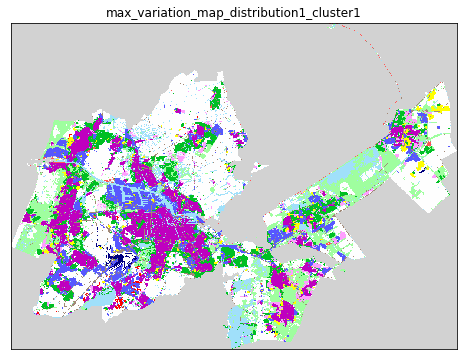

In [46]:
#plt.figure(figsize=(9, 6))
#plt.subplot(121)
print_map (ooi[1349,:,:])
plt.title('max_variation_map_distribution1_cluster1')
plt.savefig('max_variation_map_distribution1_cluster1.png',bbox_inches='tight', dpi=200 )
plt.show()

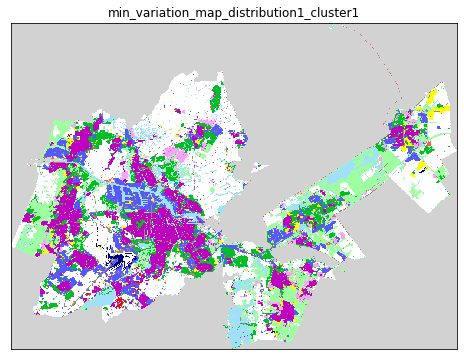

In [47]:
print_map (ooi[906,:,:])
plt.title('min_variation_map_distribution1_cluster1')
plt.savefig('min_variation_map_distribution1_cluster1.png',bbox_inches='tight', dpi=200 )
plt.show()

- Cluster 2

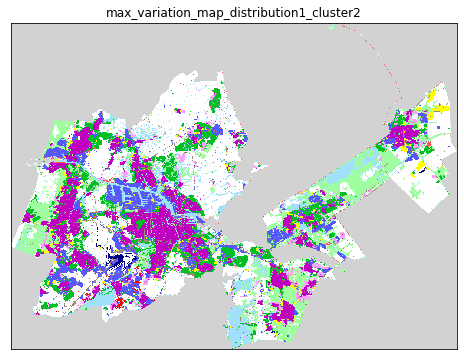

In [48]:
print_map (ooi[1382,:,:])
plt.title('max_variation_map_distribution1_cluster2')
plt.savefig('max_variation_map_distribution1_cluster2.png',bbox_inches='tight', dpi=200 )
plt.show()

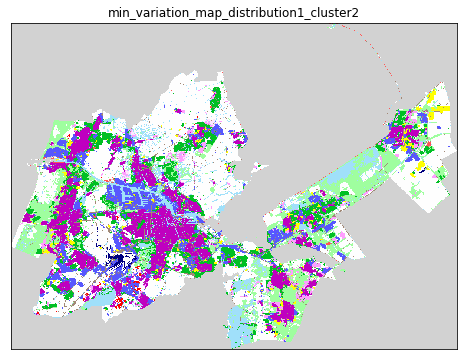

In [49]:
print_map (ooi[335,:,:])
plt.title('min_variation_map_distribution1_cluster2')
plt.savefig('min_variation_map_distribution1_cluster2.png',bbox_inches='tight', dpi=200 )
plt.show()

In [11]:
#plt.figure(figsize=(15, 10))
#plt.subplot(221)
#compare_difference(ooi[1382,:,:],initial, 6)
#plt.title('changes of Residential (L) in the high variation map')
#plt.subplot(222)
#compare_difference(ooi[335,:,:],initial, 6)
#plt.title('changes of Residential (L) in the lowest variation map')
#plt.subplot(223)
#compare_difference(ooi[1382,:,:],initial, 7)
#plt.title('changes of Residential (M) in the high variation map')
#plt.subplot(224)
#compare_difference(ooi[335,:,:],initial, 7)
#plt.title('changes of Residential (M) in the lowest variation map')

#plt.suptitle('Map 2015 vs Map 2050 \nGreen: In both map    Blue: Only in Map 2050    Red: Only in Map 2015 ')

#plt.show()

- Cluster 3

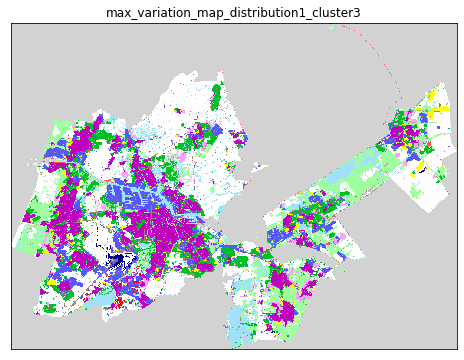

In [52]:
print_map (ooi[531,:,:])
plt.title('max_variation_map_distribution1_cluster3')
plt.savefig('max_variation_map_distribution1_cluster3.png',bbox_inches='tight', dpi=200 )
plt.show()

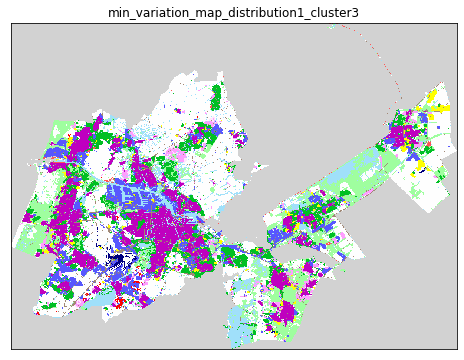

In [53]:
print_map (ooi[883,:,:])
plt.title('min_variation_map_distribution1_cluster3')
plt.savefig('min_variation_map_distribution1_cluster3.png',bbox_inches='tight', dpi=200 )
plt.show()

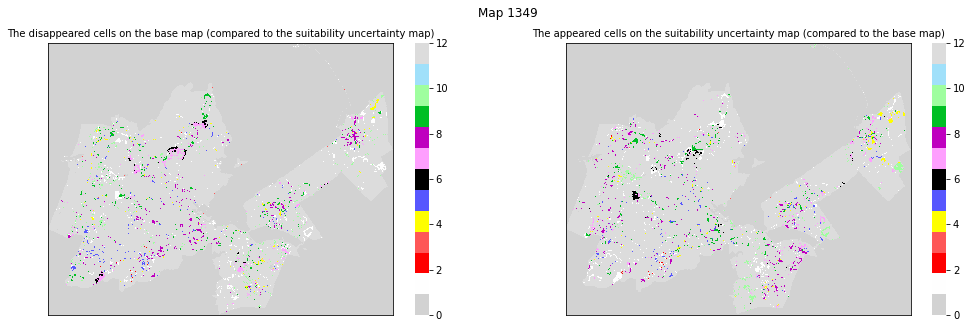

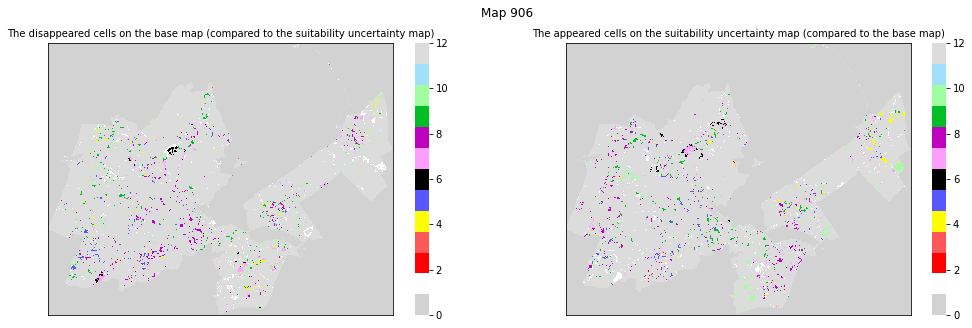

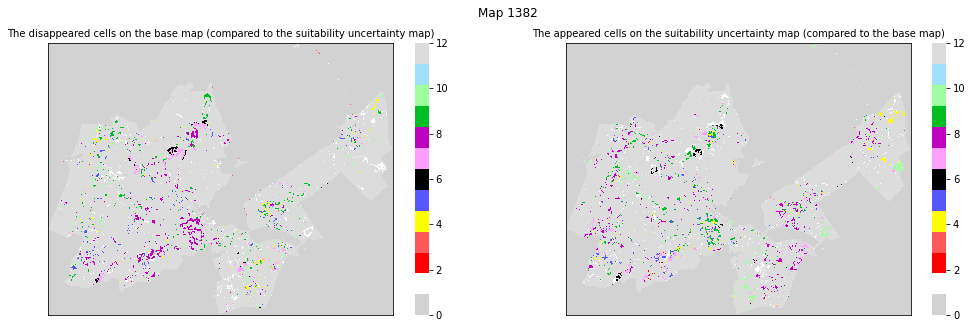

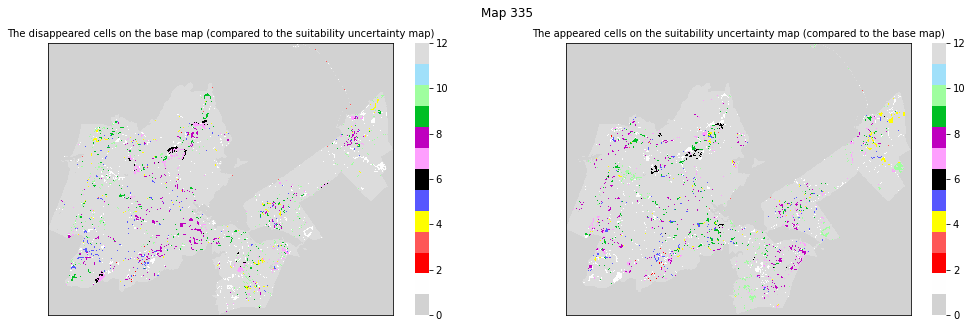

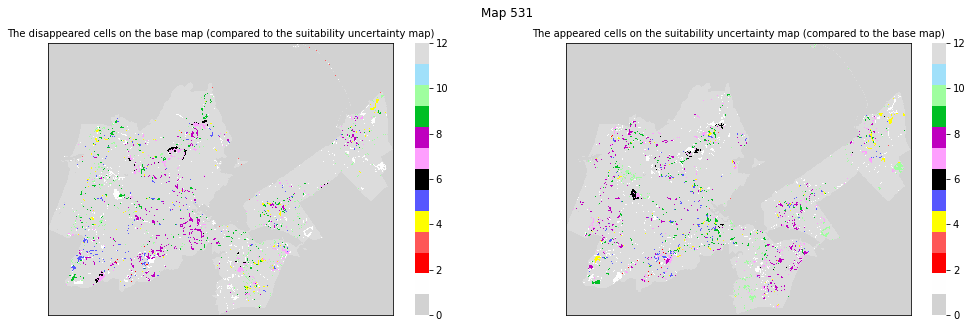

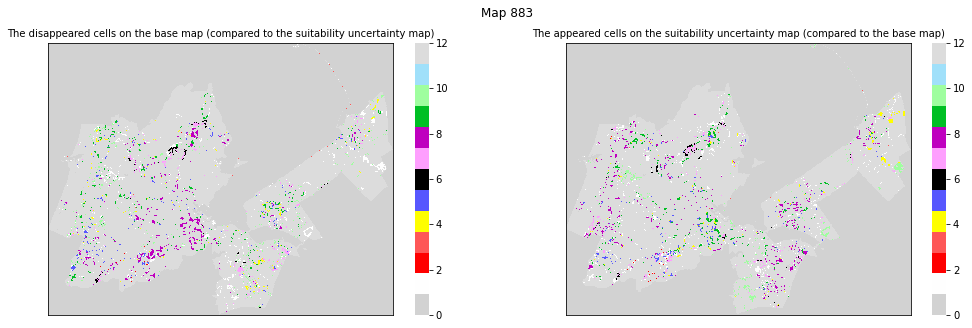

In [75]:
no_ = [1349,906, 1382,335,531,883]
for i in no_:
    plot_the_differences(ooi[i,:,:],i, base)

### Distribution 2

using the "average" linkage method (removing the outliers) with 6 clusters

Distribution: [957, 428, 602]

In [171]:
import random

In [189]:
ooi_0 = distance_new1[clustering.labels_==0] 
ooi_01 = ooi_0.T
cluster1 = ooi_01[clustering.labels_==0] 
cluster1 = cluster1.T # Kappa values for each pair comparison
arr1 = cluster1.to_numpy()
# To calculate the kappa index for each map 
cluster1['sum'] = cluster1.sum(axis=1)

In [190]:
ooi_1 = distance_new1[clustering.labels_==1]
ooi_11 = ooi_1.T
cluster2 = ooi_11[clustering.labels_==1]
cluster2 = cluster2.T
cluster2['sum'] = cluster2.sum(axis=1)

In [191]:
ooi_2 = distance_new1[clustering.labels_==2]
ooi_21 = ooi_2.T
cluster3 = ooi_21[clustering.labels_==2]
cluster3 = cluster3.T
cluster3['sum'] = cluster3.sum(axis=1)

In [178]:
sample_cluster1 = random.sample(cluster1.index.tolist(),10)

In [179]:
sample_cluster1

[354, 1901, 1501, 1991, 947, 1813, 1829, 1474, 598, 1566]

In [181]:
def count_changes_random(cluster, num, landtype):
    sample = random.sample(cluster.index.tolist(),num)
    for i in sample:
        print (count_changes(compare_difference_2(ooi[i,:,:],initial,landtype)))

In [80]:
#count_changes_random(cluster1, 20, 7)

In [81]:
#count_changes_random(cluster2, 20, 7)

In [82]:
#count_changes_random(cluster3, 20, 7)

In [263]:
def show_change_differences(cluster_1, cluster_2, num, landtype):
    sample1 = random.sample(cluster_1.index.tolist(),num)
    sample2 = random.sample(cluster_2.index.tolist(),num)
    for i in sample1:
        for j in sample2:
            plt.figure(figsize=(12, 6))
            plt.subplot(221)
            compare_difference(ooi[i,:,:],initial,landtype)
            plt.subplot(222)
            compare_difference(ooi[j,:,:],initial,landtype)
            plt.subplot(223)
            sns.heatmap (compare_difference_2(ooi[i,:,:],initial,landtype) == 
                         compare_difference_2(ooi[j,:,:],initial,landtype))
            plt.show()

In [13]:
#show_change_differences(cluster1, cluster3, 2, 8)

In [14]:
#show_change_differences(cluster2, cluster3, 2, 8)

- Cluster 1

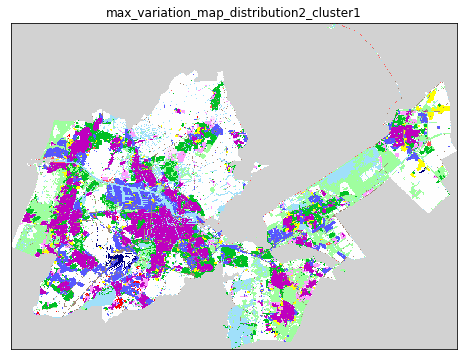

In [15]:
print_map (ooi[1726,:,:])
plt.title('max_variation_map_distribution2_cluster1')
plt.savefig('max_variation_map_distribution2_cluster1.png',bbox_inches='tight', dpi=200 )
plt.show()

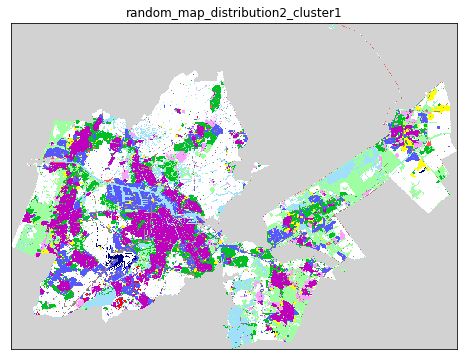

In [17]:
print_map (ooi[992,:,:])
plt.title('random_map_distribution2_cluster1')
plt.savefig('random_map_distribution2_cluster1.png',bbox_inches='tight', dpi=200 )
plt.show()

In [19]:
#plt.figure(figsize=(15, 10))
#plt.subplot(221)
#compare_difference(ooi[1726,:,:],initial, 6)
#plt.title('changes of Residential (L) in the high variation map')
#plt.subplot(222)
#compare_difference(ooi[906,:,:],initial, 6)
#plt.title('changes of Residential (L) in the lowest variation map')
#plt.subplot(223)
#compare_difference(ooi[1726,:,:],initial, 7)
#plt.title('changes of Residential (M) in the high variation map')
#plt.subplot(224)
#compare_difference(ooi[906,:,:],initial, 7)
#plt.title('changes of Residential (M) in the lowest variation map')

#plt.suptitle('Map 2015 vs Map 2050 \nGreen: In both map    Blue: Only in Map 2050    Red: Only in Map 2015 ')

#plt.show()

- Cluster 2

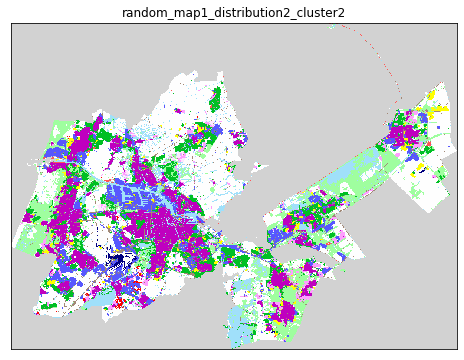

In [58]:
print_map (ooi[783,:,:])
plt.title('random_map1_distribution2_cluster2')
plt.savefig('random_map1_distribution2_cluster2.png',bbox_inches='tight', dpi=200 )
plt.show()

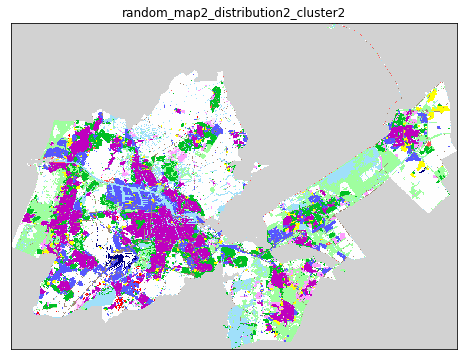

In [59]:
print_map (ooi[1846,:,:])
plt.title('random_map2_distribution2_cluster2')
plt.savefig('random_map2_distribution2_cluster2.png',bbox_inches='tight', dpi=200 )
plt.show()

In [18]:
#plt.figure(figsize=(15, 10))
#plt.subplot(221)
#compare_difference(ooi[1382,:,:],initial, 6)
#plt.title('changes of Residential (L) in the high variation map')
#plt.subplot(222)
#compare_difference(ooi[335,:,:],initial, 6)
#plt.title('changes of Residential (L) in the lowest variation map')
#plt.subplot(223)
#compare_difference(ooi[1382,:,:],initial, 7)
#plt.title('changes of Residential (M) in the high variation map')
#plt.subplot(224)
#compare_difference(ooi[335,:,:],initial, 7)
#plt.title('changes of Residential (M) in the lowest variation map')

#plt.suptitle('Map 2015 vs Map 2050 \nGreen: In both map    Blue: Only in Map 2050    Red: Only in Map 2015 ')

#plt.show()

- Cluster3

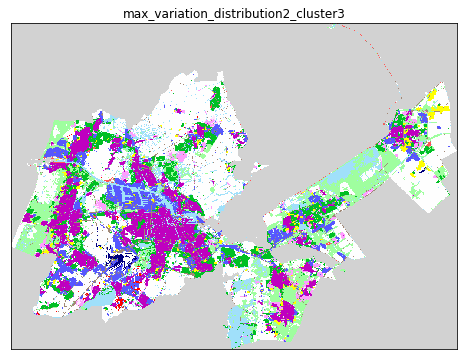

In [60]:
print_map (ooi[1110,:,:])
plt.title('max_variation_distribution2_cluster3')
plt.savefig('max_variation_distribution2_cluster3.png',bbox_inches='tight', dpi=200 )
plt.show()

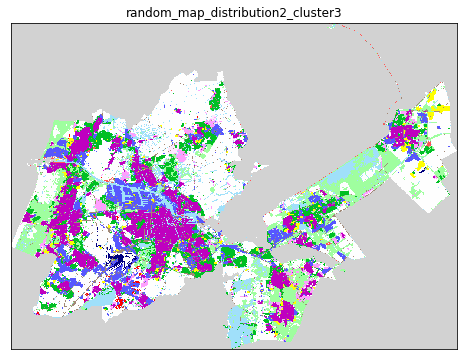

In [61]:
print_map (ooi[1646,:,:])
plt.title('random_map_distribution2_cluster3')
plt.savefig('random_map_distribution2_cluster3.png',bbox_inches='tight', dpi=200 )
plt.show()

In [21]:
#plt.figure(figsize=(15, 10))
#plt.subplot(221)
#compare_difference(ooi[1110,:,:],initial, 6)
#plt.title('changes of Residential (L) in the high variation map')
#plt.subplot(222)
#compare_difference(ooi[883,:,:],initial, 6)
#plt.title('changes of Residential (L) in the lowest variation map')
#plt.subplot(223)
#compare_difference(ooi[1110,:,:],initial, 7)
#plt.title('changes of Residential (M) in the high variation map')
#plt.subplot(224)
#compare_difference(ooi[883,:,:],initial, 7)
#plt.title('changes of Residential (M) in the lowest variation map')
#plt.suptitle('Map 2015 vs Map 2050 \nGreen: In both map    Blue: Only in Map 2050    Red: Only in Map 2015 ')
#plt.show()

### Distribution 3 
MDS(4) + Agglomerative(4) 

Distribution[697, 423, 879，1]

- Cluster 1

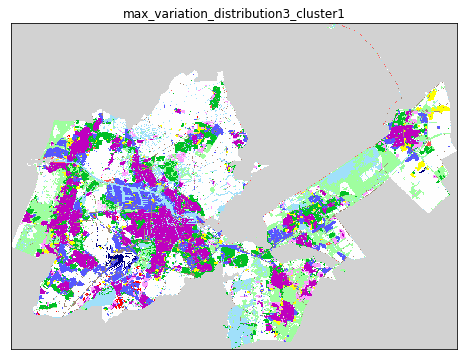

In [62]:
print_map (ooi[208,:,:])
plt.title('max_variation_distribution3_cluster1')
plt.savefig('max_variation_distribution3_cluster1.png',bbox_inches='tight', dpi=200 )
plt.show()

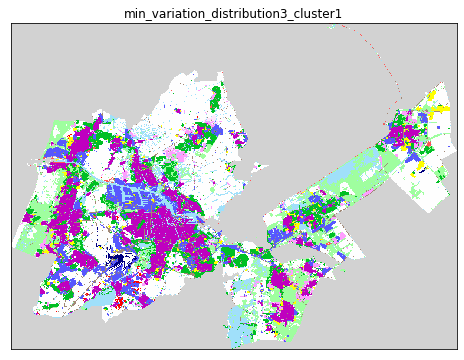

In [63]:
print_map (ooi[909,:,:])
plt.title('min_variation_distribution3_cluster1')
plt.savefig('min_variation_distribution3_cluster1.png',bbox_inches='tight', dpi=200 )
plt.show()

In [22]:
#plt.figure(figsize=(20, 20))
#plt.subplot(321)
#compare_difference(ooi[909,:,:],initial, 6)
#plt.title('changes of Residential (L) in the high variation map')
#plt.subplot(322)
#compare_difference(ooi[208,:,:],initial, 6)
#plt.title('changes of Residential (L) in the lowest variation map')
#plt.subplot(323)
#compare_difference(ooi[909,:,:],initial, 7)
#plt.title('changes of Residential (M) in the high variation map')
#plt.subplot(324)
#compare_difference(ooi[208,:,:],initial, 7)
#plt.title('changes of Residential (M) in the lowest variation map')
#plt.subplot(325)
#compare_difference(ooi[909,:,:],initial, 8)
#plt.title('changes of Residential (H) in the high variation map')
#plt.subplot(326)
#compare_difference(ooi[208,:,:],initial, 8)
#plt.title('changes of Residential (H) in the lowest variation map')
#plt.suptitle('Map 2015 vs Map 2050 \nGreen: In both map    Blue: Only in Map 2050    Red: Only in Map 2015 ')

#plt.show()

- Cluster 2

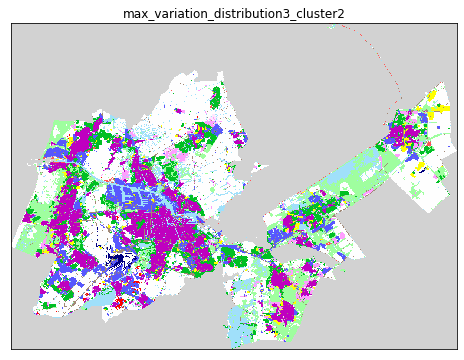

In [64]:
print_map (ooi[1414,:,:])
plt.title('max_variation_distribution3_cluster2')
plt.savefig('max_variation_distribution3_cluster2.png',bbox_inches='tight', dpi=200 )
plt.show()

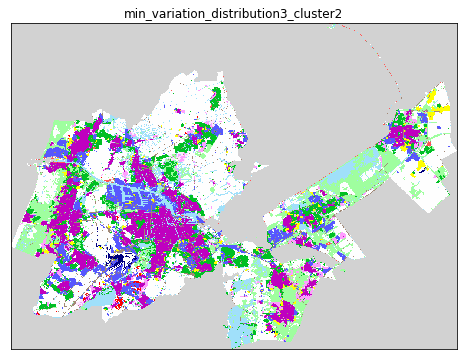

In [65]:
print_map (ooi[1171,:,:])
plt.title('min_variation_distribution3_cluster2')
plt.savefig('min_variation_distribution3_cluster2.png',bbox_inches='tight', dpi=200 )
plt.show()

In [23]:
#plt.figure(figsize=(20, 20))
#plt.subplot(321)
#compare_difference(ooi[1171,:,:],initial, 6)
#plt.title('changes of Residential (L) in the high variation map')
#plt.subplot(322)
#compare_difference(ooi[1414,:,:],initial, 6)
#plt.title('changes of Residential (L) in the lowest variation map')
#plt.subplot(323)
#compare_difference(ooi[1171,:,:],initial, 7)
#plt.title('changes of Residential (M) in the high variation map')
#plt.subplot(324)
#compare_difference(ooi[1414,:,:],initial, 7)
#plt.title('changes of Residential (M) in the lowest variation map')
#plt.subplot(325)
#compare_difference(ooi[1171,:,:],initial, 8)
#plt.title('changes of Residential (H) in the high variation map')
#plt.subplot(326)
#compare_difference(ooi[1414,:,:],initial, 8)
#plt.title('changes of Residential (H) in the lowest variation map')
#plt.suptitle('Map 2015 vs Map 2050 \nGreen: In both map    Blue: Only in Map 2050    Red: Only in Map 2015 ')

#plt.show()

- Cluster 3

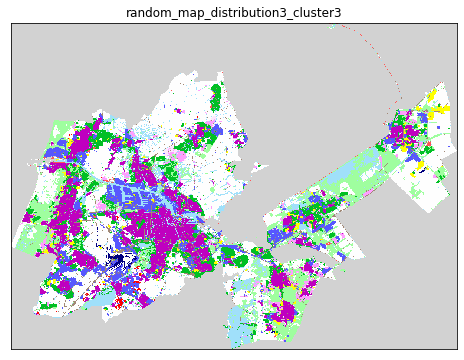

In [67]:
print_map (ooi[938,:,:])
plt.title('random_map_distribution3_cluster3')
plt.savefig('random_map_distribution3_cluster3.png',bbox_inches='tight', dpi=200 )
plt.show()

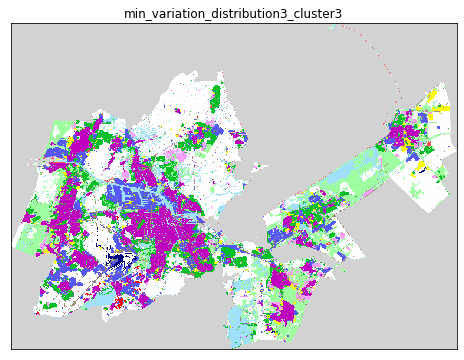

In [66]:
print_map (ooi[1131,:,:])
plt.title('min_variation_distribution3_cluster3')
plt.savefig('min_variation_distribution3_cluster3.png',bbox_inches='tight', dpi=200 )
plt.show()

<AxesSubplot:>

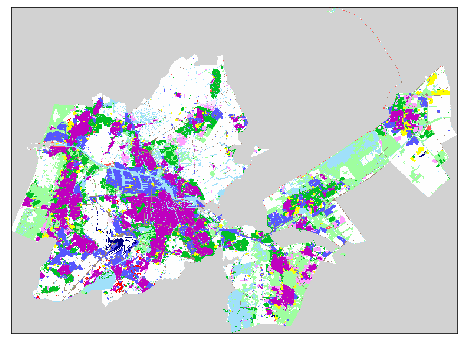

In [72]:
print_map (ooi[1995,:,:])

#### Distribution 4

- Cluster 1

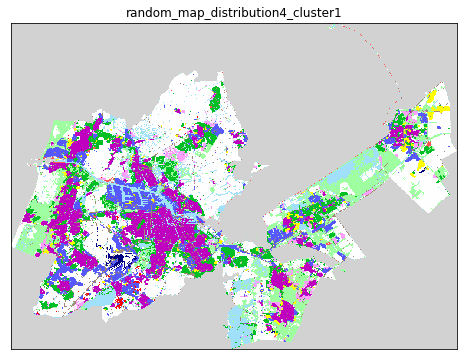

In [73]:
print_map (ooi[708,:,:])
plt.title('random_map_distribution4_cluster1')
plt.savefig('random_map_distribution4_cluster1.png',bbox_inches='tight', dpi=200 )
plt.show()

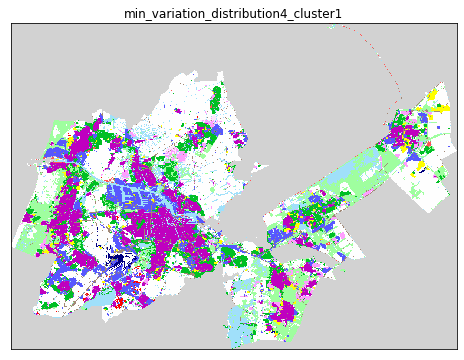

In [74]:
print_map (ooi[1338,:,:])
plt.title('min_variation_distribution4_cluster1')
plt.savefig('min_variation_distribution4_cluster1.png',bbox_inches='tight', dpi=200 )
plt.show()

- Cluster 2

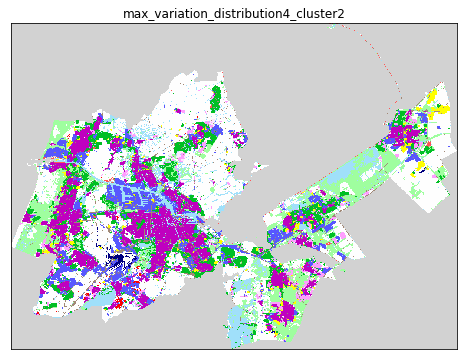

In [77]:
print_map (ooi[785,:,:])
plt.title('max_variation_distribution4_cluster2')
plt.savefig('max_variation_distribution4_cluster2.png',bbox_inches='tight', dpi=200 )
plt.show()

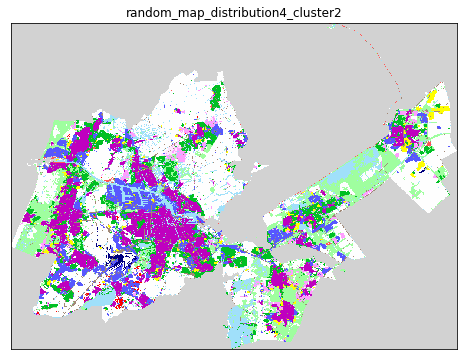

In [76]:
print_map (ooi[1875,:,:])
plt.title('random_map_distribution4_cluster2')
plt.savefig('random_map_distribution4_cluster2.png',bbox_inches='tight', dpi=200 )
plt.show()

- Cluster 3

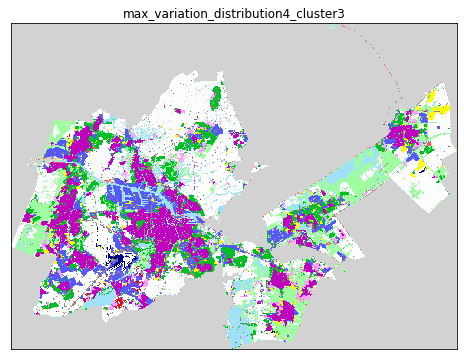

In [78]:
print_map (ooi[1949,:,:])
plt.title('max_variation_distribution4_cluster3')
plt.savefig('max_variation_distribution4_cluster3.png',bbox_inches='tight', dpi=200 )
plt.show()

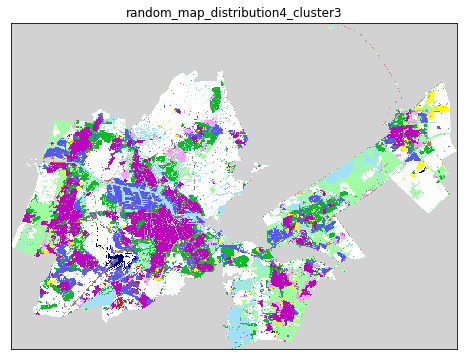

In [81]:
print_map (ooi[1951,:,:])
plt.title('random_map_distribution4_cluster3')
plt.savefig('random_map_distribution4_cluster3.png',bbox_inches='tight', dpi=200 )
plt.show()

- Cluster 4

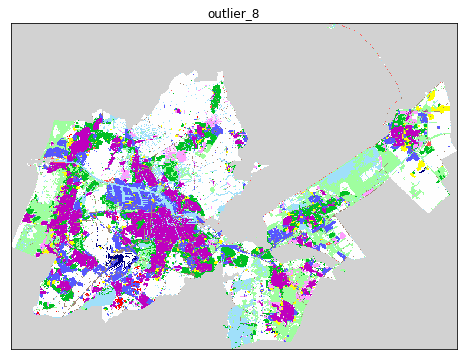

In [82]:
print_map (ooi[1964,:,:])
plt.title('outlier_8')
plt.savefig('outlier_8.png',bbox_inches='tight', dpi=200 )
plt.show()

#### Outliers

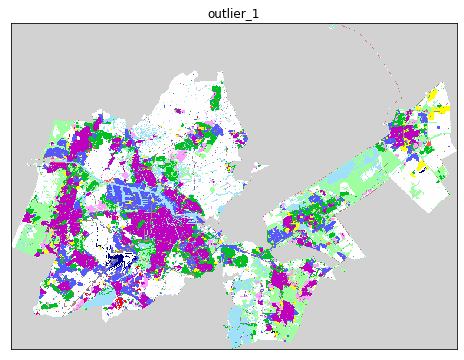

In [338]:
print_map (ooi[178,:,:])
plt.title('outlier_1')
plt.savefig('outlier_1.png',bbox_inches='tight', dpi=200 )
plt.show()

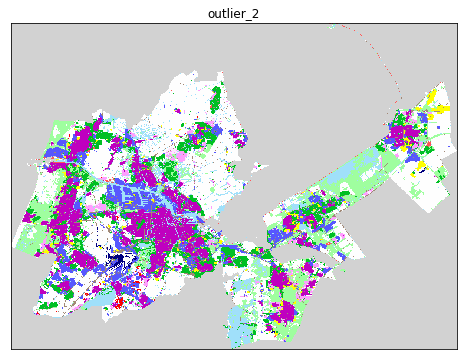

In [84]:
print_map (ooi[1195,:,:])
plt.title('outlier_2')
plt.savefig('outlier_2.png',bbox_inches='tight', dpi=200 )
plt.show()

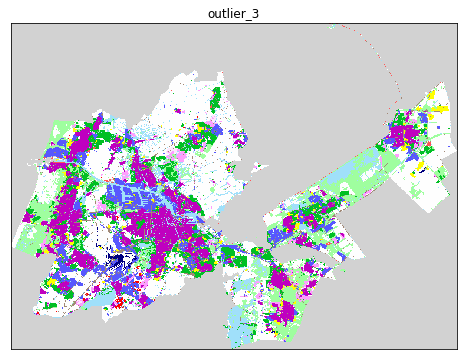

In [85]:
print_map (ooi[1366,:,:])
plt.title('outlier_3')
plt.savefig('outlier_3.png',bbox_inches='tight', dpi=200 )
plt.show()

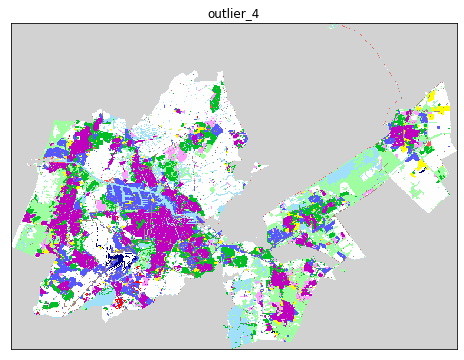

In [86]:
print_map (ooi[1467,:,:])
plt.title('outlier_4')
plt.savefig('outlier_4.png',bbox_inches='tight', dpi=200 )
plt.show()

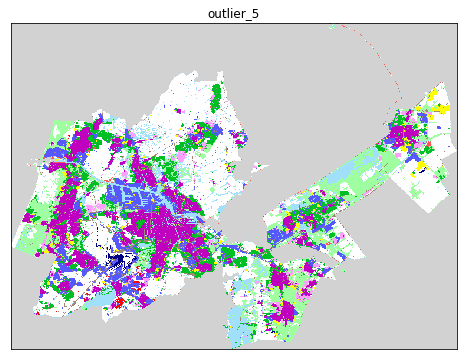

In [87]:
print_map (ooi[1649,:,:])
plt.title('outlier_5')
plt.savefig('outlier_5.png',bbox_inches='tight', dpi=200 )
plt.show()

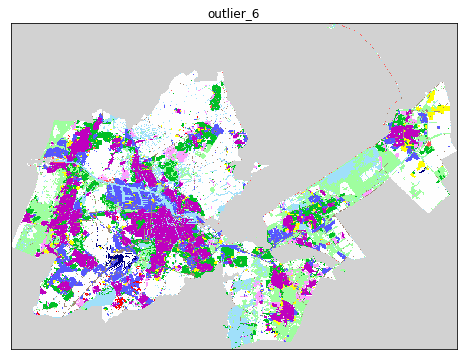

In [88]:
print_map (ooi[1737,:,:])
plt.title('outlier_6')
plt.savefig('outlier_6.png',bbox_inches='tight', dpi=200 )
plt.show()

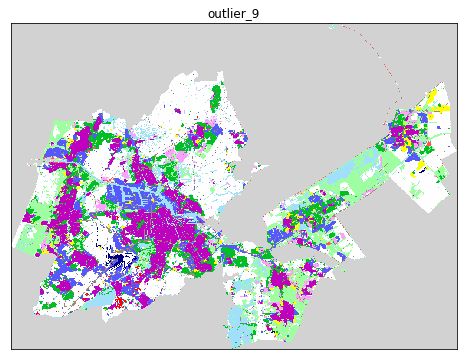

In [92]:
print_map (ooi[577,:,:])
plt.title('outlier_9')
plt.savefig('outlier_9.png',bbox_inches='tight', dpi=200 )
plt.show()

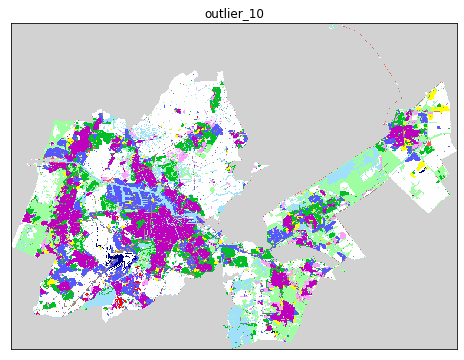

In [91]:
print_map (ooi[1584,:,:])
plt.title('outlier_10')
plt.savefig('outlier_10.png',bbox_inches='tight', dpi=200 )
plt.show()